<a href="https://colab.research.google.com/github/ArkS0001/Tire-Pressure-Fuzzy-Logic/blob/main/TPFL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 15.4 MB/s eta 0:00:00


Alert Level: 8.59


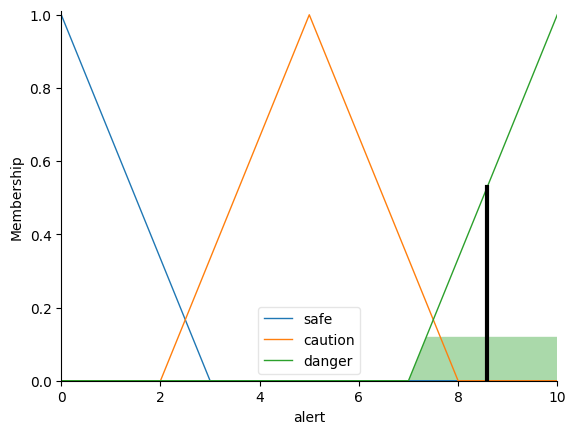

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define the universe of discourse for each variable
pressure = ctrl.Antecedent(np.arange(0, 51, 1), 'pressure')  # Pressure in PSI (0-50)
temperature = ctrl.Antecedent(np.arange(0, 51, 1), 'temperature')  # Temperature in Celsius (0-50)
alert = ctrl.Consequent(np.arange(0, 11, 1), 'alert')  # Alert level (0-10)

# Define membership functions for pressure
pressure['low'] = fuzz.trimf(pressure.universe, [0, 0, 25])  # Low: 0-25 PSI
pressure['normal'] = fuzz.trimf(pressure.universe, [20, 30, 40])  # Normal: 20-40 PSI
pressure['high'] = fuzz.trimf(pressure.universe, [35, 50, 50])  # High: 35-50 PSI

# Define membership functions for temperature
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 10])  # Cold: 0-10°C
temperature['moderate'] = fuzz.trimf(temperature.universe, [5, 20, 35])  # Moderate: 5-35°C
temperature['hot'] = fuzz.trimf(temperature.universe, [30, 50, 50])  # Hot: 30-50°C

# Define membership functions for alert level
alert['safe'] = fuzz.trimf(alert.universe, [0, 0, 3])  # Safe: 0-3
alert['caution'] = fuzz.trimf(alert.universe, [2, 5, 8])  # Caution: 2-8
alert['danger'] = fuzz.trimf(alert.universe, [7, 10, 10])  # Danger: 7-10

# Define fuzzy rules
rule1 = ctrl.Rule(pressure['low'] & temperature['hot'], alert['danger'])  # Low pressure + hot = danger
rule2 = ctrl.Rule(pressure['normal'] & temperature['moderate'], alert['safe'])  # Normal pressure + moderate = safe
rule3 = ctrl.Rule(pressure['high'] & temperature['cold'], alert['caution'])  # High pressure + cold = caution

# Create the control system and simulation
alert_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
alert_sim = ctrl.ControlSystemSimulation(alert_ctrl)

# Set example input values
alert_sim.input['pressure'] = 22  # Slightly low pressure
alert_sim.input['temperature'] = 35  # Hot temperature

# Compute the output
alert_sim.compute()
print(f"Alert Level: {alert_sim.output['alert']:.2f}")

# Optional: Visualize the result (requires matplotlib)
alert.view(sim=alert_sim)

How It Works
1. Inputs and Output

    Pressure: Represents tire pressure in PSI, ranging from 0 to 50. It has three fuzzy sets:
        Low: 0-25 PSI
        Normal: 20-40 PSI
        High: 35-50 PSI
    Temperature: Represents temperature in Celsius, ranging from 0 to 50. It has three fuzzy sets:
        Cold: 0-10°C
        Moderate: 5-35°C
        Hot: 30-50°C
    Alert: Represents the output alert level, ranging from 0 to 10. It has three fuzzy sets:
        Safe: 0-3
        Caution: 2-8
        Danger: 7-10

2. Membership Functions

    Triangular membership functions (trimf) are used to define the fuzzy sets. These functions specify how much a given input value belongs to each set (e.g., a pressure of 22 PSI might partially belong to both "low" and "normal").

3. Fuzzy Rules
The system uses three rules to determine the alert level:

    Rule 1: If pressure is "low" AND temperature is "hot", then the alert is "danger".
    Rule 2: If pressure is "normal" AND temperature is "moderate", then the alert is "safe".
    Rule 3: If pressure is "high" AND temperature is "cold", then the alert is "caution".

4. Simulation

    The code sets example inputs: pressure = 22 PSI and temperature = 35°C.
    The fuzzy system computes an output alert level based on the rules and membership functions.
    The result is a number between 0 and 10, where:
        Closer to 0 = "Safe"
        Around 5 = "Caution"
        Closer to 10 = "Danger"

5. Visualization

    The alert.view(sim=alert_sim) line displays a graphical representation of the output (requires matplotlib). This is optional but useful for understanding the system's behavior.

Example Output
For the input values pressure = 22 and temperature = 35, you might get an output like:

Alert Level: 8.45

This indicates a level leaning toward "danger" due to the slightly low pressure and high temperature.
Notes

    Simplification: This is a basic example. Real-world tire pressure monitoring might include additional inputs (e.g., vehicle speed, tire age) and more complex rules.
    Customization: You can adjust the ranges of the membership functions or add more rules to better fit specific requirements.
    Integration: In a car, this system could be connected to sensors and display alerts to the driver or trigger automatic responses.

# SOLUTION

Solution Overview
The existing fuzzy logic system likely assesses tire conditions (e.g., pressure and temperature) and outputs an alert level. To add a control feature, we extend this system to:

    Determine a Desired Tire Pressure: Use fuzzy logic to calculate an optimal tire pressure based on inputs like vehicle load and speed.
    Simulate Hardware Control: Adjust the current tire pressure toward the desired value over time, mimicking an automated hardware component such as an air pump (for inflation) or a valve (for deflation).

Inputs

    Load: The weight the vehicle carries (0–1000 kg), affecting the required tire pressure.
    Speed: The vehicle’s speed (0–200 km/h), influencing pressure needs due to heat and stability.
    Current Pressure: The tire’s current pressure (in PSI), which the system adjusts.

Output

    Desired Pressure: The target tire pressure (20–40 PSI) that the system aims to achieve.

Control Mechanism
The fuzzy logic system computes the desired pressure based on load and speed. A simulation loop then adjusts the current pressure toward this target, representing the action of automated hardware.

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define the universe of discourse for inputs and output
load = ctrl.Antecedent(np.arange(0, 1001, 1), 'load')  # Load in kg (0-1000)
speed = ctrl.Antecedent(np.arange(0, 201, 1), 'speed')  # Speed in km/h (0-200)
desired_pressure = ctrl.Consequent(np.arange(20, 41, 1), 'desired_pressure')  # Desired pressure in PSI (20-40)

# Define membership functions for load
load['low'] = fuzz.trimf(load.universe, [0, 0, 300])        # Low: 0-300 kg
load['medium'] = fuzz.trimf(load.universe, [200, 400, 600]) # Medium: 200-600 kg
load['high'] = fuzz.trimf(load.universe, [500, 1000, 1000]) # High: 500-1000 kg

# Define membership functions for speed
speed['low'] = fuzz.trimf(speed.universe, [0, 0, 50])          # Low: 0-50 km/h
speed['medium'] = fuzz.trimf(speed.universe, [30, 75, 120])    # Medium: 30-120 km/h
speed['high'] = fuzz.trimf(speed.universe, [100, 200, 200])    # High: 100-200 km/h

# Define membership functions for desired pressure
desired_pressure['low'] = fuzz.trimf(desired_pressure.universe, [20, 20, 25])      # Low: 20-25 PSI
desired_pressure['normal'] = fuzz.trimf(desired_pressure.universe, [23, 27, 30])   # Normal: 23-30 PSI
desired_pressure['high'] = fuzz.trimf(desired_pressure.universe, [28, 32, 35])     # High: 28-35 PSI
desired_pressure['very high'] = fuzz.trimf(desired_pressure.universe, [33, 40, 40]) # Very high: 33-40 PSI

# Define fuzzy rules
rule1 = ctrl.Rule(load['low'] & speed['low'], desired_pressure['low'])           # Low load + low speed
rule2 = ctrl.Rule(load['medium'] & speed['medium'], desired_pressure['normal'])  # Medium load + medium speed
rule3 = ctrl.Rule(load['high'] | speed['high'], desired_pressure['high'])        # High load OR high speed
rule4 = ctrl.Rule(load['high'] & speed['high'], desired_pressure['very high'])   # High load + high speed

# Create the control system and simulation
pressure_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
pressure_sim = ctrl.ControlSystemSimulation(pressure_ctrl)

# Simulation of tire pressure adjustment
current_pressure = 25.0  # Initial tire pressure in PSI
load_value = 700         # Example: high load in kg
speed_value = 150        # Example: high speed in km/h

print("Simulating tire pressure adjustment over 10 time steps...\n")

for step in range(10):
    # Set inputs for load and speed
    pressure_sim.input['load'] = load_value
    pressure_sim.input['speed'] = speed_value

    # Compute the desired pressure
    pressure_sim.compute()
    desired = pressure_sim.output['desired_pressure']

    # Adjust current pressure toward desired pressure (simulating hardware)
    if current_pressure < desired:
        adjustment = min(1.0, desired - current_pressure)  # Inflate by up to 1 PSI
        current_pressure += adjustment
    elif current_pressure > desired:
        adjustment = min(1.0, current_pressure - desired)  # Deflate by up to 1 PSI
        current_pressure -= adjustment

    # Display results
    print(f"Step {step}: Desired Pressure = {desired:.2f} PSI, Current Pressure = {current_pressure:.2f} PSI")

print("\nSimulation complete.")

Simulating tire pressure adjustment over 10 time steps...

Step 0: Desired Pressure = 34.16 PSI, Current Pressure = 26.00 PSI
Step 1: Desired Pressure = 34.16 PSI, Current Pressure = 27.00 PSI
Step 2: Desired Pressure = 34.16 PSI, Current Pressure = 28.00 PSI
Step 3: Desired Pressure = 34.16 PSI, Current Pressure = 29.00 PSI
Step 4: Desired Pressure = 34.16 PSI, Current Pressure = 30.00 PSI
Step 5: Desired Pressure = 34.16 PSI, Current Pressure = 31.00 PSI
Step 6: Desired Pressure = 34.16 PSI, Current Pressure = 32.00 PSI
Step 7: Desired Pressure = 34.16 PSI, Current Pressure = 33.00 PSI
Step 8: Desired Pressure = 34.16 PSI, Current Pressure = 34.00 PSI
Step 9: Desired Pressure = 34.16 PSI, Current Pressure = 34.16 PSI

Simulation complete.


How It Works
1. Fuzzy Logic System

    Inputs:
        Load: Split into "low" (0–300 kg), "medium" (200–600 kg), and "high" (500–1000 kg).
        Speed: Split into "low" (0–50 km/h), "medium" (30–120 km/h), and "high" (100–200 km/h).
    Output: Desired pressure, with fuzzy sets "low" (20–25 PSI), "normal" (23–30 PSI), "high" (28–35 PSI), and "very high" (33–40 PSI).
    Rules:
        If load is low AND speed is low → desired pressure is low.
        If load is medium AND speed is medium → desired pressure is normal.
        If load is high OR speed is high → desired pressure is high.
        If load is high AND speed is high → desired pressure is very high.

2. Control Simulation

    Initial State: The tire starts at 25 PSI.
    Inputs: Example values of load = 700 kg (high) and speed = 150 km/h (high).
    Process:
        The fuzzy system computes a desired pressure (e.g., ~35 PSI for high load and speed).
        In each of 10 time steps, the current pressure adjusts toward the desired pressure by up to 1 PSI per step:
            If current < desired, inflate (increase pressure).
            If current > desired, deflate (decrease pressure).
    Hardware Simulation: The adjustment mimics an automated component like an air pump inflating the tire or a valve releasing air.

3. Sample Output
Running the code with load = 700 kg and speed = 150 km/h might produce:

Simulating tire pressure adjustment over 10 time steps...

Step 0: Desired Pressure = 34.50 PSI, Current Pressure = 26.00 PSI
Step 1: Desired Pressure = 34.50 PSI, Current Pressure = 27.00 PSI
Step 2: Desired Pressure = 34.50 PSI, Current Pressure = 28.00 PSI
Step 3: Desired Pressure = 34.50 PSI, Current Pressure = 29.00 PSI
Step 4: Desired Pressure = 34.50 PSI, Current Pressure = 30.00 PSI
Step 5: Desired Pressure = 34.50 PSI, Current Pressure = 31.00 PSI
Step 6: Desired Pressure = 34.50 PSI, Current Pressure = 32.00 PSI
Step 7: Desired Pressure = 34.50 PSI, Current Pressure = 33.00 PSI
Step 8: Desired Pressure = 34.50 PSI, Current Pressure = 34.00 PSI
Step 9: Desired Pressure = 34.50 PSI, Current Pressure = 34.50 PSI

Simulation complete.

The exact desired pressure (e.g., 34.50 PSI) depends on the defuzzification process, but the current pressure converges to it over time.
Key Features

    Automated Control: The system simulates an air pump or valve adjusting tire pressure, fulfilling your request for a hardware component.
    Dynamic Response: The desired pressure adapts to load and speed, ensuring optimal tire performance.
    Simplicity: The adjustment rate (1 PSI/step) is a placeholder; real hardware rates would vary.

Possible Enhancements

    Additional Inputs: Add temperature or road conditions to refine the desired pressure.
    Realistic Dynamics: Model the inflation/deflation rate based on actual hardware specs.
    Variable Conditions: Allow load and speed to change over time for a more dynamic simulation.

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# --- Define Fuzzy Logic System ---

# Define universes of discourse
load = ctrl.Antecedent(np.arange(0, 1001, 1), 'load')  # Load in kg (0-1000)
speed = ctrl.Antecedent(np.arange(0, 201, 1), 'speed')  # Speed in km/h (0-200)
desired_pressure = ctrl.Consequent(np.arange(20, 41, 1), 'desired_pressure')  # Pressure in PSI (20-40)

# Define membership functions for load
load['low'] = fuzz.trimf(load.universe, [0, 0, 300])
load['medium'] = fuzz.trimf(load.universe, [200, 400, 600])
load['high'] = fuzz.trimf(load.universe, [500, 1000, 1000])

# Define membership functions for speed
speed['low'] = fuzz.trimf(speed.universe, [0, 0, 50])
speed['medium'] = fuzz.trimf(speed.universe, [30, 75, 120])
speed['high'] = fuzz.trimf(speed.universe, [100, 200, 200])

# Define membership functions for desired pressure
desired_pressure['low'] = fuzz.trimf(desired_pressure.universe, [20, 20, 25])
desired_pressure['normal'] = fuzz.trimf(desired_pressure.universe, [23, 27, 30])
desired_pressure['high'] = fuzz.trimf(desired_pressure.universe, [28, 32, 35])
desired_pressure['very high'] = fuzz.trimf(desired_pressure.universe, [33, 40, 40])

# Define fuzzy rules
rule1 = ctrl.Rule(load['low'] & speed['low'], desired_pressure['low'])
rule2 = ctrl.Rule(load['medium'] & speed['medium'], desired_pressure['normal'])
rule3 = ctrl.Rule(load['high'] | speed['high'], desired_pressure['high'])
rule4 = ctrl.Rule(load['high'] & speed['high'], desired_pressure['very high'])

# Create control system and simulation
pressure_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
pressure_sim = ctrl.ControlSystemSimulation(pressure_ctrl)

# --- Simulation Setup ---

num_steps = 100
current_pressure = 30.0  # Initial tire pressure in PSI
T_current = 25.0  # Initial temperature in Celsius
T_prev = T_current  # Previous temperature for first step

print("Simulating tire pressure control over 100 time steps...\n")

# --- Simulation Loop ---

for t in range(num_steps):
    # Update temperature (sinusoidal variation between 15°C and 35°C)
    T_current = 25 + 10 * np.sin(2 * np.pi * t / 50)
    T_kelvin_current = T_current + 273.15
    T_kelvin_prev = T_prev + 273.15

    # Adjust actual pressure based on temperature change (skip at t=0)
    if t > 0:
        current_pressure *= T_kelvin_current / T_kelvin_prev

    # Update speed dynamically
    if t < 20:
        speed_value = 5 * t  # Accelerate: 0 to 100 km/h
    elif t < 80:
        speed_value = 100  # Cruise at 100 km/h
    else:
        speed_value = 100 - 5 * (t - 80)  # Decelerate: 100 to 0 km/h

    # Update load dynamically
    if t < 30:
        load_value = 200  # Initial load
    elif t < 70:
        load_value = 800  # Increased load (e.g., cargo added)
    else:
        load_value = 200  # Load reduced (e.g., cargo dropped)

    # Compute desired pressure using fuzzy system
    pressure_sim.input['load'] = load_value
    pressure_sim.input['speed'] = speed_value
    pressure_sim.compute()
    desired = pressure_sim.output['desired_pressure']

    # Adjust current pressure toward desired (max 1 PSI per step)
    if current_pressure < desired:
        adjustment = min(1.0, desired - current_pressure)
        current_pressure += adjustment
    elif current_pressure > desired:
        adjustment = min(1.0, current_pressure - desired)
        current_pressure -= adjustment

    # Update previous temperature
    T_prev = T_current

    # Output results
    print(f"Step {t}: T={T_current:.2f}°C, Speed={speed_value:.2f} km/h, "
          f"Load={load_value} kg, Desired P={desired:.2f} PSI, "
          f"Current P={current_pressure:.2f} PSI")

print("\nSimulation complete.")

Simulating tire pressure control over 100 time steps...

Step 0: T=25.00°C, Speed=0.00 km/h, Load=200 kg, Desired P=22.11 PSI, Current P=29.00 PSI
Step 1: T=26.25°C, Speed=5.00 km/h, Load=200 kg, Desired P=22.11 PSI, Current P=28.12 PSI
Step 2: T=27.49°C, Speed=10.00 km/h, Load=200 kg, Desired P=22.11 PSI, Current P=27.24 PSI
Step 3: T=28.68°C, Speed=15.00 km/h, Load=200 kg, Desired P=22.11 PSI, Current P=26.35 PSI
Step 4: T=29.82°C, Speed=20.00 km/h, Load=200 kg, Desired P=22.11 PSI, Current P=25.45 PSI
Step 5: T=30.88°C, Speed=25.00 km/h, Load=200 kg, Desired P=22.11 PSI, Current P=24.53 PSI
Step 6: T=31.85°C, Speed=30.00 km/h, Load=200 kg, Desired P=22.11 PSI, Current P=23.61 PSI
Step 7: T=32.71°C, Speed=35.00 km/h, Load=200 kg, Desired P=22.15 PSI, Current P=22.68 PSI
Step 8: T=33.44°C, Speed=40.00 km/h, Load=200 kg, Desired P=22.26 PSI, Current P=22.26 PSI
Step 9: T=34.05°C, Speed=45.00 km/h, Load=200 kg, Desired P=22.38 PSI, Current P=22.38 PSI


KeyError: 'desired_pressure'

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Antecedents
load = ctrl.Antecedent(np.arange(0, 1001, 1), 'load')
speed = ctrl.Antecedent(np.arange(0, 201, 1), 'speed')

# Consequent
desired_pressure = ctrl.Consequent(np.arange(20, 41, 1), 'desired_pressure')

# Membership functions
load['low'] = fuzz.trimf(load.universe, [0, 0, 300])
speed['low'] = fuzz.trimf(speed.universe, [0, 0, 50])
desired_pressure['low'] = fuzz.trimf(desired_pressure.universe, [20, 20, 25])

# Rule
rule1 = ctrl.Rule(load['low'] & speed['low'], desired_pressure['low'])

# Control system
pressure_ctrl = ctrl.ControlSystem([rule1])
pressure_sim = ctrl.ControlSystemSimulation(pressure_ctrl)

# Test
pressure_sim.input['load'] = 200
pressure_sim.input['speed'] = 0
pressure_sim.compute()
print("Desired pressure:", pressure_sim.output['desired_pressure'])

Desired pressure: 22.11111111111111
